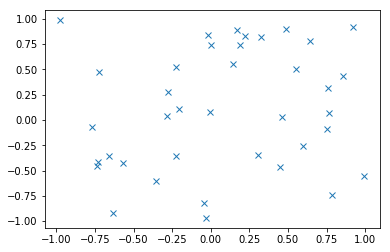

In [33]:
# Generate random coordinates in 2D
import numpy as np
import random
import matplotlib.pyplot as plt

N_Cities = 38

x = np.random.uniform(-1, 1, N_Cities)
y = np.random.uniform(-1, 1, N_Cities)

plt.plot(x, y, 'x')
plt.show()

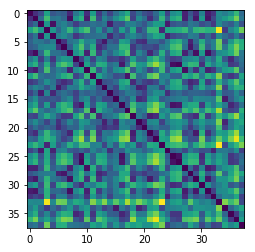

In [34]:
# Generate all distances into a matrix to avoid spending time on it later
dist_arr = np.zeros([N_Cities, N_Cities])
for i in range(N_Cities):
    for j in range(N_Cities):
        dist_arr[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
        
plt.imshow(dist_arr)
plt.show()

In [35]:
# Create a function to easily calculate the sum
def sumTrail(perm):
    rez = 0
    for i in range(len(perm) - 1):
        rez += dist_arr[perm[i], perm[i+1]]
    
    return rez
        
# Compute sum for the first permutation
print(sumTrail(list(range(N_Cities))))

35.8942980624


In [8]:
# TRY-OUT:
# Preconditioner
#   Try to make the matrix weakly-diagonal-dominant, s.t. weights would increase, the further you are from diagonal

# Algorithm No1: Naive Brute-force

In [40]:
# Constraint on maximum number of iterations
iMax = 10000
permEffIdxList = list(range(iMax))

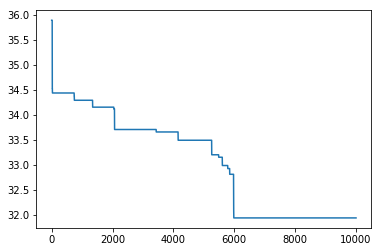

In [43]:
# Generate permutations
import itertools
cityIdxList = list(range(N_Cities))
permSet = itertools.permutations(cityIdxList)

# Iterate for a fixed number of steps
bestRezBrute = np.zeros(iMax+1)
bestRezBrute[0] = float('inf')

i = 0
for perm in permSet:
    i += 1
    bestRezBrute[i] = min(bestRezBrute[i-1], sumTrail(perm))
    
    if i == iMax:
        break

bestRezBrute = bestRezBrute[1:]
plt.plot(permEffIdxList, bestRezBrute)
plt.show()

# Algorithm No2: Naive Random

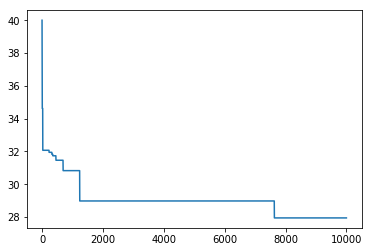

In [44]:
# Iterate for a fixed number of steps
bestRezNaiveRand = np.zeros(iMax+1)
bestRezNaiveRand[0] = float('inf')

for i in range(1, iMax+1):
    perm = np.random.permutation(N_Cities)
    bestRezNaiveRand[i] = min(bestRezNaiveRand[i-1], sumTrail(perm))

bestRezNaiveRand = bestRezNaiveRand[1:]
plt.plot(permEffIdxList, bestRezNaiveRand)
plt.show()

# Algorithm No3: Random Gradient Descent

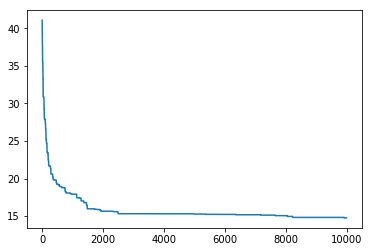

In [45]:
# Iterate for a fixed number of steps
bestRezRandGD = np.zeros(iMax+1)
bestRezRandGD[0] = float('inf')

permInitial = np.random.permutation(N_Cities)

for i in range(1, iMax+1):
    
    # Generate two distinct random numbers
    a_swap = random.randint(0, N_Cities-1)
    b_swap = random.randint(0, N_Cities-1)
    while a_swap == b_swap:
        b_swap = random.randint(0, N_Cities-1)
        
    # Generate temporary distribution
    # by performing one random swap of the original distribution
    permTmp = np.copy(permInitial)
    permTmp[a_swap], permTmp[b_swap] = permTmp[b_swap], permTmp[a_swap]
    
    rezTmp = sumTrail(permTmp)
    if rezTmp < bestRezRandGD[i-1]:
        permInitial = permTmp
        bestRezRandGD[i] = rezTmp
    else:
        bestRezRandGD[i] = bestRezRandGD[i-1]

        
bestRezRandGD = bestRezRandGD[1:]
plt.plot(permEffIdxList, bestRezRandGD)
plt.show()

# Algorithm 4: Noisy Random Gradient Descent

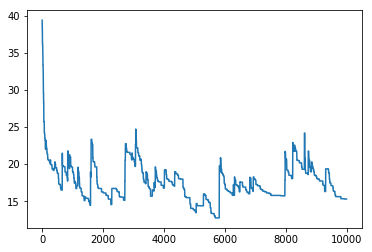

In [66]:
# Iterate for a fixed number of steps
bestRezRandNGD = np.zeros(iMax+1)
bestRezRandNGD[0] = float('inf')

permInitial = np.random.permutation(N_Cities)

for i in range(1, iMax+1):
    
    # Generate two distinct random numbers
    a_swap = random.randint(0, N_Cities-1)
    b_swap = random.randint(0, N_Cities-1)
    while a_swap == b_swap:
        b_swap = random.randint(0, N_Cities-1)
        
    # Generate temporary distribution
    # by performing one random swap of the original distribution
    permTmp = np.copy(permInitial)
    permTmp[a_swap], permTmp[b_swap] = permTmp[b_swap], permTmp[a_swap]
    
    rezTmp = sumTrail(permTmp)
    
    temperature = 1 - float(i)/iMax
    noisyRandomAccept = np.random.uniform() < 0.01*temperature
    
    if noisyRandomAccept or (rezTmp < bestRezRandNGD[i-1]):
        permInitial = permTmp
        bestRezRandNGD[i] = rezTmp
    else:
        bestRezRandNGD[i] = bestRezRandNGD[i-1]

        
bestRezRandNGD = bestRezRandNGD[1:]
plt.plot(permEffIdxList, bestRezRandNGD)
plt.show()

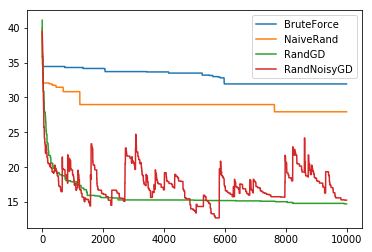

In [67]:
plt.plot(permEffIdxList, bestRezBrute, label="BruteForce")
plt.plot(permEffIdxList, bestRezNaiveRand, label="NaiveRand")
plt.plot(permEffIdxList, bestRezRandGD, label="RandGD")
plt.plot(permEffIdxList, bestRezRandNGD, label="RandNoisyGD")
plt.legend()
plt.show()